In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,recall_score,precision_score, f1_score,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [2]:
#reading data from .csv file into dataframe
dataset = pd.read_csv("diabetes.csv")
#print(dataset)
dataset['Diabetes'] = dataset['diabetes'].apply(lambda x: 1 if x== 'Diabetes' else 0)
dataset = dataset.drop('diabetes', axis= 'columns')
# dataset = dataset.drop('chol_hdl_ratio', axis ='columns')
# dataset = dataset.drop('waist_hip_ratio', axis ='columns')
dataset.head(5)

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,Diabetes
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,0
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,0
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,0
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,0
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,0


In [3]:
#gender columnn has string, replaced it 0 (male) and 1(female)
dummies = pd.get_dummies(dataset.gender)
#print(dummies)
dataset = pd.concat([dataset, dummies], axis = 'columns')
dataset.drop('gender', axis ='columns', inplace=True)
y = dataset['Diabetes']
X = dataset.drop('Diabetes', axis= 'columns')
#print(X.head(5))
#print(y.head(5))

In [4]:
#checking if any cloumn consists of null value
X.columns[X.isna().any()]



Index([], dtype='object')

In [5]:
#spliting into training and test data
X_train, X_test , y_train, y_test  = train_test_split(X, y, train_size= 0.80, shuffle= True)
#print(X_train)
#print(y_train)


In [6]:
#creating, training Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [7]:
#testing
y_pred = model.predict(X_test)
# df = pd.da
# print(y_pred.apply(lambda x: 1 if x== 'Diabetes' else 0))
#print(y_test.shape, y_pred.shape)


Testing Accuracy  0.9102564102564102
F1 score:  0.6956521739130435
Recall score:  0.9102564102564102
Precision score:  0.9102564102564102
Confusion Matrix:  [[63  4]
 [ 3  8]]
Visulization of confusion matrix


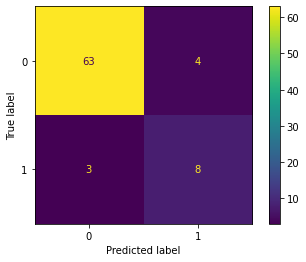

In [8]:
#model accuracy

#print('After dropping dependent columns')
print("Testing Accuracy ", accuracy_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred, average='micro'))
print("Precision score: ", precision_score(y_test, y_pred, average='micro'))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cm)
print("Visulization of confusion matrix")
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()